<a href="https://colab.research.google.com/github/2303A510C0/AIML-2303A510C0/blob/main/Lab%2002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment -- 02

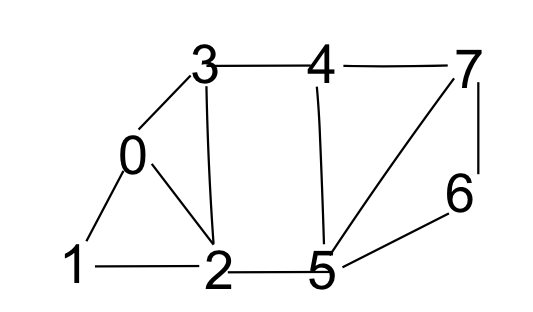

In [1]:
from queue import Queue
graph = {0:[1,2,3],1:[0,2],2:[0,1,3,5],3:[0,2,4],4:[3,5,7],5:[4,6,7],6:[5,7],7:[4,5,6],8:[4,6,7]}
print("the adjacency List representing the graph is:")
print(graph)


the adjacency List representing the graph is:
{0: [1, 2, 3], 1: [0, 2], 2: [0, 1, 3, 5], 3: [0, 2, 4], 4: [3, 5, 7], 5: [4, 6, 7], 6: [5, 7], 7: [4, 5, 6], 8: [4, 6, 7]}


In [2]:
def bfs(graph,source):
  Q = Queue()
  visited_vertices = set()
  Q.put(source)
  visited_vertices.add(source)
  while not Q.empty():
    vertex = Q.get()
    print(vertex,end="-->")
    for u in graph[vertex]:
      if u not in visited_vertices:
        Q.put(u)
        visited_vertices.update ({u})
print("BFS traversal of the graph is:")
bfs(graph,1)

BFS traversal of the graph is:
1-->0-->2-->3-->5-->4-->6-->7-->

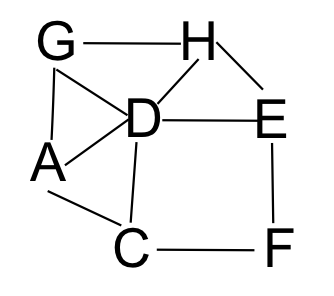

In [3]:
from queue import Queue
graph1 = {'A':['C','D','G'], 'B':['A'], 'C':['A','D','F'],'F':['C','E','D','F'],'E':['H','D','F'],'H':['D','E','G'],'G':['A','D','H'],'D':['A','E','F','C','H','G']}
print("the adjacency List representing the graph is:")
print(graph1)

the adjacency List representing the graph is:
{'A': ['C', 'D', 'G'], 'B': ['A'], 'C': ['A', 'D', 'F'], 'F': ['C', 'E', 'D', 'F'], 'E': ['H', 'D', 'F'], 'H': ['D', 'E', 'G'], 'G': ['A', 'D', 'H'], 'D': ['A', 'E', 'F', 'C', 'H', 'G']}


In [4]:
def dfs(graph, node, visited):
  if node not in visited:
    visited.append(node)
    for k in graph[node]:
      dfs(graph,k, visited)
  return visited

visited = dfs(graph1, 'B', [])
print(visited)

['B', 'A', 'C', 'D', 'E', 'H', 'G', 'F']


In [ ]:
from copy import deepcopy
import numpy as np
import time


def bestsolution(state):
    bestsol = np.array([], int).reshape(-1, 9)
    count = len(state) - 1
    while count != -1:
        bestsol = np.insert(bestsol, 0, state[count]['puzzle'], 0)
        count = (state[count]['parent'])
    return bestsol.reshape(-1, 3, 3)

def all(checkarray):
    set=[]
    for it in set:
        for checkarray in it:
            return 1
        else:
            return 0
def misplaced_tiles(puzzle,goal):
    mscost = np.sum(puzzle != goal) - 1
    return mscost if mscost > 0 else 0


def coordinates(puzzle):
    pos = np.array(range(9))
    for p, q in enumerate(puzzle):
        pos[q] = p
    return pos

def evaluvate_misplaced(puzzle, goal):
    steps = np.array([('up', [0, 1, 2], -3),('down', [6, 7, 8],  3),('left', [0, 3, 6], -1),('right', [2, 5, 8],  1)],
                dtype =  [('move',  str, 1),('position', list),('head', int)])

    dtstate = [('puzzle',  list),('parent', int),('gn',  int),('hn',  int)]

    costg = coordinates(goal)

    parent = -1
    gn = 0
    hn = misplaced_tiles(coordinates(puzzle), costg)
    state = np.array([(puzzle, parent, gn, hn)], dtstate)
    dtpriority = [('position', int),('fn', int)]

    priority = np.array([(0, hn)], dtpriority)

    while 1:
        priority = np.sort(priority, kind='mergesort', order=['fn', 'position'])
        position, fn = priority[0]


    dtpriority = [('position', int),('fn', int)]

    priority = np.array([(0, hn)], dtpriority)

    while 1:
        priority = np.sort(priority, kind='mergesort', order=['fn', 'position'])
        position, fn = priority[0]

        priority = np.delete(priority, 0, 0)
        puzzle, parent, gn, hn = state[position]
        puzzle = np.array(puzzle)

        blank = int(np.where(puzzle == 0)[0])

        gn = gn + 1
        c = 1
        start_time = time.time()
        for s in steps:
            c = c + 1
            if blank not in s['position']:
                openstates = deepcopy(puzzle)
                openstates[blank], openstates[blank + s['head']] = openstates[blank + s['head']], openstates[blank]

                if ~(np.all(list(state['puzzle']) == openstates, 1)).any():
                    end_time = time.time()
                    if (( end_time - start_time ) > 2):
                        print(" The 8 puzzle is unsolvable \n")
                        break

                    hn = misplaced_tiles(coordinates(openstates), costg)
                    q = np.array([(openstates, position, gn, hn)], dtstate)
                    state = np.append(state, q, 0)

                    fn = gn + hn

                    q = np.array([(len(state) - 1, fn)], dtpriority)
                    priority = np.append(priority, q, 0)

                    if np.array_equal(openstates, goal):
                        print(' The 8 puzzle is solvable \n')
                        return state, len(priority)

    return state, len(priority)

puzzle = []

puzzle.append(4)
puzzle.append(1)
puzzle.append(5)
puzzle.append(3)
puzzle.append(0)
puzzle.append(7)
puzzle.append(8)
puzzle.append(6)
puzzle.append(2)


goal = []

goal.append(1)
goal.append(2)
goal.append(3)
goal.append(4)
goal.append(5)
goal.append(6)
goal.append(7)
goal.append(8)
goal.append(0)


state, visited = evaluvate_misplaced(puzzle, goal)
bestpath = bestsolution(state)
print(str(bestpath).replace('[', ' ').replace(']', ''))
totalmoves = len(bestpath) - 1
print('\nSteps to reach goal:',totalmoves)
visit = len(state) - visited
print('Total nodes visited: ',visit,"\n")